In [2]:
test_data.equals(test_data_temp) and train_data.equals(train_data_temp) and tuning_data.equals(tune_data_temp)

NameError: name 'test_data' is not defined

In [3]:
from autogluon.tabular import TabularDataset, TabularPredictor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Table of contents 

**Exploratory data analysis**
To avoid the deduction, you should do at least four or more items of the following list:

- Search domain knowledge 
- Check if the data is intuitive
- Understand how the data was generated
- Explore individual features
- Explore pairs and groups of features
- Clean up features

**Feature engineering**
To avoid the deduction, you should try one or more feature engineering techniques (i.e., feature selection and/or feature extraction) in the long notebook.

**Number of predictors**
To avoid the deduction, you should try two or more types of predictors in the long notebook (e.g., XGBoost and Random Forest). It is allowed to use only one type of predictor in the short notebook and Kaggle predictions.

**Model interpretation**
To avoid the deduction, you should use one or more model interpretation techniques (e.g., PDP, feature importance, LIME) in the long notebook.

# Domain Knowledge Gathering

This is a list of the sources we found to understand the domain of solar energy forecasting. 

1-s2.0-S1364032121010364-main.pdf
https://www.researchgate.net/publication/359439616_A_review_of_solar_forecasting_its_dependence_on_atmospheric_sciences_and_implications_for_grid_integration_Towards_carbon_neutrality

Benchmarks-for-solar-radiation-time-series-forecasting_2022_Renewable-Energy.pdf
https://hal.science/hal-03995928/document


Ensemble-solar-forecasting-and-post-processing-using-d_2022_Renewable-and-Su.pdf
https://www.researchgate.net/publication/356726325_Ensemble_solar_forecasting_and_post-processing_using_dropout_neural_network_and_information_from_neighboring_satellite_pixels


Integrated-life-cycle-optimisation-and-supply-si_2022_Renewable-and-Sustaina.pdf
https://uwe-repository.worktribe.com/output/8219224/integrated-life-cycle-optimisation-and-supply-side-management-for-building-retrofitting

On-post-processing-day-ahead-NWP-forecasts-using-Kalman-filt_2019_Solar-Ener.pdf
https://www.researchgate.net/publication/331370405_On_post-processing_day-ahead_NWP_forecasts_using_Kalman_filtering

Sub-minute-probabilistic-solar-forecasting-for-_2022_Renewable-and-Sustainab.pdf
https://www.researchgate.net/publication/355533775_Sub-minute_probabilistic_solar_forecasting_for_real-time_stochastic_simulations

Verification-of-deterministic-solar-forecasts_2020_Solar-Energy.pdf
https://personal.utdallas.edu/~jiezhang/Journals/Zhang_2020_SE_deterministic_verification.pdf

# Understanding data

## Notes for individual features after doing EDA

Throughout the project we have done extensive EDA. We have taken notes along the way, here are our notes. Further down in the notebook some of the EDA that has been performed can be seen, however it is easier to read the notes here.

After reading about the individual features in the website that is linked to on blackboard, we ended up discarding quite a few features that we thought would not help that much in prediction the power production. These are some quick notes that we made after reading about the features. We got quite a good score by using the selection of these features at about 146. However, in the end, we found out that the best solution was to use almost all the features.


### All raw features overview
| Feature | Notes |
| --- | --- |
| absolute_humidity_2m:gm3 | - |
| air_density_2m:kgm3 | - |
| ceiling_height_agl:m | Drop them |
| clear_sky_energy_1h:J | Drop them |
| clear_sky_rad:W | Drop them |
| cloud_base_agl:m | Drop them |
| dew_or_rime:idx | Change to two variables for is_dew and is_rime |
| dew_point_2m:K | - |
| diffuse_rad:W | - |
| diffuse_rad_1h:J | - |
| direct_rad:W | - |
| direct_rad_1h:J | - |
| effective_cloud_cover:p | Use this, don't use total_cloud_cover:p |
| elevation:m | - |
| fresh_snow_12h:cm | Drop it |
| fresh_snow_1h:cm | Keep for reflection |
| fresh_snow_24h:cm | Drop it |
| fresh_snow_3h:cm | Drop it |
| fresh_snow_6h:cm | Drop it |
| is_day:idx | Drop it, better variables available |
| is_in_shadow:idx | Drop it, better variables available |
| msl_pressure:hPa | Drop pressure features? |
| precip_5min:mm | Drop it |
| precip_type_5min:idx | Drop it |
| pressure_100m:hPa | Drop pressure features? |
| pressure_50m:hPa | Drop pressure features? |
| prob_rime:p | - |
| rain_water:kgm2 | - |
| relative_humidity_1000hPa:p | - |
| sfc_pressure:hPa | Drop pressure features? |
| snow_density:kgm3 | Set missing values to zero |
| snow_depth:cm | Keep for reflection |
| snow_drift:idx | Always 0 for loc A, drop it |
| snow_melt_10min:mm | - |
| snow_water:kgm2 | - |
| sun_azimuth:d | Transform using sin and cos, possibly combine |
| sun_elevation:d | Transform using sin and cos, possibly combine |
| super_cooled_liquid_water:kgm2 | - |
| t_1000hPa:K | Use with wind speed and direct radiation for efficiency modeling |
| total_cloud_cover:p | Do not use; prefer effective_cloud_cover:p |
| visibility:m | - |
| wind_speed_10m:ms | Keep this and drop u, v, w components |
| wind_speed_u_10m:ms | Drop, since wind_speed_10m:ms is kept |
| wind_speed_v_10m:ms | Drop, since wind_speed_10m:ms is kept |
| wind_speed_w_1000hPa:ms | Drop, since wind_speed_10m:ms is kept |
| is_estimated | - |
| y | - |
| location | - |



### More spesific
| Feature | Notes |
| --- | --- |
| t_1000hPa:K, direct_rad | Maybe we can use these together with wind speed inverse or something, to model of efficiency of the solar panel, because higher wind will move air around the panels faster. |
| wind_speed_u_10m:ms, wind_speed_v_10m:ms, wind_speed_w_1000hPa:ms | can be dropped, since we have wind_speed_10m:ms |
| azimuth:d, elevation:d | These can maybe be transformed using sin and cos, and maybe combine them? |
| snow and precipitation | I think we only should keep snow_depth:cm (for reflection) and fresh_snow_1h:cm.  snow_density:kgm3 has a ton of missing values. Maybe we should set those to zero. Maybe it is so that when the snow density is above a certain value it covers the solar panels. |
| snow_drift | Always 0 for loc A, so we can drop it |
| pressure | drop it? |
| radiation | use only last hour, not effect (W) create global_rad_1h:J, which is the sum of direct_rad_1h:J and diffuse_rad_1h:J drop clear_sky_energy_1h:J and clear_sky_rad:W |
| clear_sky_energy_1h:J and clear_sky_rad:W | drop them |
| cloud height | drop them |
| dew_or_rime:idx | Change this to one variable for is_dew and one variable for is_rime |
| is_in_shadow:idx and is_day:idx | drop them, we have better variables for this, e.g. effective_cloud_cover:p (dont use total_cloud_cover:p) |




### Notes
no variables should be negative, so we can set all negative values to 0

# Config

In [4]:
# config

label = 'y'
metric = 'mean_absolute_error'
time_limit = 60*60
presets = "experimental_zeroshot_hpo_hybrid"#'best_quality'

do_drop_ds = True
# hour, dayofweek, dayofmonth, month, year
use_dt_attrs = []#["hour", "year"]
use_estimated_diff_attr = False
use_is_estimated_attr = True

drop_night_outliers = True
drop_null_outliers = False

# to_drop = ["snow_drift:idx", "snow_density:kgm3", "wind_speed_w_1000hPa:ms", "dew_or_rime:idx", "prob_rime:p", "fresh_snow_12h:cm", "fresh_snow_24h:cm", "wind_speed_u_10m:ms", "wind_speed_v_10m:ms", "snow_melt_10min:mm", "rain_water:kgm2", "dew_point_2m:K", "precip_5min:mm", "absolute_humidity_2m:gm3", "air_density_2m:kgm3"]#, "msl_pressure:hPa", "pressure_50m:hPa",  "pressure_100m:hPa"]
to_drop = ["wind_speed_w_1000hPa:ms", "wind_speed_u_10m:ms", "wind_speed_v_10m:ms"]

excluded_model_types = ['CAT', 'XGB', 'RF']

use_groups = False
n_groups = 8

# auto_stack = True
num_stack_levels = 0
num_bag_folds = None# 8
num_bag_sets = None#20

use_tune_data = True
use_test_data = True
#tune_and_test_length = 0.5 # 3 months from end
# holdout_frac = None
use_bag_holdout = True # Enable this if there is a large gap between score_val and score_test in stack models. 

sample_weight = None#'sample_weight' #None
weight_evaluation = False#
sample_weight_estimated = 1
sample_weight_may_july = 1

run_analysis = False

shift_predictions_by_average_of_negatives_then_clip = False
clip_predictions = True
shift_predictions = False

# Preprocessing / Feature Engineering

In [5]:
class FeatureEngineer:
    def __init__(self):
        self.columns_to_shift = [
            'clear_sky_energy_1h:J', 'diffuse_rad_1h:J', 'direct_rad_1h:J',
            'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm',
            'fresh_snow_3h:cm', 'fresh_snow_6h:cm'
        ]

    # set X setter
    def set_X(self, X):
        self.X = X

    def shift_columns_by_one_hour(self):
        X_shifted = self.X[self.X.index.minute == 0][self.columns_to_shift].copy()
        one_hour = pd.Timedelta('1 hour')
        shifted_indices = X_shifted.index + one_hour
        index_set = set(self.X.index)
        X_shifted.loc[shifted_indices.isin(index_set)] = self.X.loc[shifted_indices[shifted_indices.isin(index_set)]][self.columns_to_shift]
        self.X_shifted = X_shifted

    def handle_edge_cases(self):
        self.X_shifted.iloc[-1] = self.X_shifted.iloc[-2]

    def count_shifted_rows(self):
        shifted_indices = self.X_shifted.index + pd.Timedelta('1 hour')
        index_set = set(self.X_shifted.index)
        self.count1 = len(shifted_indices[shifted_indices.isin(index_set)])
        self.count2 = len(self.X_shifted) - self.count1

    def resample_to_hourly(self):
        self.X = self.X.resample('H').mean()

    def integrate_shifted_data(self):
        self.X[self.columns_to_shift] = self.X_shifted[self.columns_to_shift]
        if 'date_calc' in self.X.columns:
            self.X['date_calc'] = self.X[self.X.index.minute == 0]['date_calc']

    def process(self, X):
        self.X = X
        self.shift_columns_by_one_hour()
        self.handle_edge_cases()
        self.count_shifted_rows()
        self.resample_to_hourly()
        self.integrate_shifted_data()

        return self.X


def convert_to_datetime_and_set_index(X, date_column='date_forecast', new_index_name='ds'):
    """
    Convert a specified date column to a datetime object, sort the DataFrame based on this column,
    and then set it as the index.

    Parameters:
    - X (pd.DataFrame): The input DataFrame with the date column to be converted.
    - date_column (str): The name of the column containing date information to be converted.
    - new_index_name (str): The name of the new datetime index.

    Returns:
    - pd.DataFrame: The transformed DataFrame with the new datetime index.
    """

    # Convert the date column to a datetime object and create a new column
    X[new_index_name] = pd.to_datetime(X[date_column])

    # Remove the original date column from the DataFrame
    X.drop(columns=[date_column], inplace=True, errors='ignore')

    # Sort the DataFrame based on the new datetime column
    X.sort_values(by=new_index_name, inplace=True)

    # Set the new datetime column as the index of the DataFrame
    X.set_index(new_index_name, inplace=True)

    return X


def preprocess(X_train_observed, X_train_estimated, X_test, y_train):
    X_train_observed = convert_to_datetime_and_set_index(X_train_observed)
    X_train_estimated = convert_to_datetime_and_set_index(X_train_estimated)
    X_test = convert_to_datetime_and_set_index(X_test)
    y_train = convert_to_datetime_and_set_index(y_train, date_column='time', new_index_name='ds')


    return X_train_observed, X_train_estimated, X_test, y_train

def feature_engineering(X_train_observed, X_train_estimated, X_test, y_train):
    feature_engineer = FeatureEngineer()

    X_train_observed = feature_engineer.process(X_train_observed)
    X_train_estimated = feature_engineer.process(X_train_estimated)
    X_test = feature_engineer.process(X_test)

    return X_train_observed, X_train_estimated, X_test, y_train

def handle_estimated_diff(X_train_observed, X_train_estimated, X_test):
    if use_estimated_diff_attr:
        X_train_observed["estimated_diff_hours"] = 0
        X_train_estimated["estimated_diff_hours"] = (X_train_estimated.index - pd.to_datetime(X_train_estimated["date_calc"])).dt.total_seconds() / 3600
        X_test["estimated_diff_hours"] = (X_test.index - pd.to_datetime(X_test["date_calc"])).dt.total_seconds() / 3600

        X_train_estimated["estimated_diff_hours"] = X_train_estimated["estimated_diff_hours"].astype('int64')
        X_test["estimated_diff_hours"] = X_test["estimated_diff_hours"].fillna(-50).astype('int64')

    return X_train_observed, X_train_estimated, X_test

def handle_is_estimated(X_train_observed, X_train_estimated, X_test):
    if use_is_estimated_attr:
        X_train_observed["is_estimated"] = 0
        X_train_estimated["is_estimated"] = 1
        X_test["is_estimated"] = 1
    return X_train_observed, X_train_estimated, X_test

def drop_columns(X_train_estimated, X_test, columns_to_drop=['date_calc']):
    X_train_estimated.drop(columns=columns_to_drop, inplace=True)
    X_test.drop(columns=columns_to_drop, inplace=True)
    return X_train_estimated, X_test

def rename_target(y_train):
    y_train["y"] = y_train["pv_measurement"].astype('float64')
    y_train.drop(columns=['pv_measurement'], inplace=True)
    return y_train

def merge_data(X_train_observed, X_train_estimated, y_train):
    X_train = pd.concat([X_train_observed, X_train_estimated])
    X_train = pd.merge(X_train, y_train, how="inner", left_index=True, right_index=True)
    return X_train

def set_location(X_train, X_test, location):
    X_train["location"] = location
    X_test["location"] = location
    return X_train, X_test

def preprocess_data(X_train_observed, X_train_estimated, X_test, y_train, location):
    # Convert to datetime and feature engineering
    X_train_observed, X_train_estimated, X_test, y_train = preprocess(X_train_observed, X_train_estimated, X_test, y_train)
    X_train_observed, X_train_estimated, X_test, y_train = feature_engineering(X_train_observed, X_train_estimated, X_test, y_train)

    # Handle estimated differences
    X_train_observed, X_train_estimated, X_test = handle_estimated_diff(X_train_observed, X_train_estimated, X_test)

    # Handle is_estimated attribute
    X_train_observed, X_train_estimated, X_test = handle_is_estimated(X_train_observed, X_train_estimated, X_test)

    # Drop date_calc column
    X_train_estimated, X_test = drop_columns(X_train_estimated, X_test)

    # Rename target
    y_train = rename_target(y_train)

    # Merge data
    X_train = merge_data(X_train_observed, X_train_estimated, y_train)

    # Set location
    X_train, X_test = set_location(X_train, X_test, location)

    return X_train, X_test


def load_and_process():
    # Define locations
    X_trains = []
    X_tests = []
    # Loop through locations
    for loc in locations:
        print(f"Processing location {loc}...")
        # Read target training data
        y_train = pd.read_parquet(f'{loc}/train_targets.parquet')
        X_train_estimated = pd.read_parquet(f'{loc}/X_train_estimated.parquet')
        X_train_observed= pd.read_parquet(f'{loc}/X_train_observed.parquet')
        X_test_estimated = pd.read_parquet(f'{loc}/X_test_estimated.parquet')

        X_train, X_test = preprocess_data(X_train_observed, X_train_estimated, X_test_estimated, y_train, loc)

        X_trains.append(X_train)
        X_tests.append(X_test)

    # Concatenate all data and save to csv
    X_train = pd.concat(X_trains)
    X_test = pd.concat(X_tests)

    return X_train, X_test

locations = ['A', 'B', 'C']
X_train, X_test = load_and_process()
X_train.columns

Processing location A...
Processing location B...
Processing location C...


Index(['absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms', 'wind_speed_v_10

# Removing anomalies

In [6]:

# loop thorugh x train[y], keep track of streaks of same values and replace them with nan if they are too long
# also replace nan with 0
def replace_streaks_with_nan(df, max_streak_length, column="y"):
    for location in df["location"].unique():
        x = df[df["location"] == location][column].copy()

        last_val = None
        streak_length = 1
        streak_indices = []
        allowed = [0]
        found_streaks = {}

        for idx in x.index:
            value = x[idx]
            # if location == "B":
            #     continue

            if value == last_val and value not in allowed:
                streak_length += 1
                streak_indices.append(idx)
            else:
                streak_length = 1
                last_val = value
                streak_indices.clear()

            if streak_length > max_streak_length:
                found_streaks[value] = streak_length

                for streak_idx in streak_indices:
                    x[idx] = np.nan
                streak_indices.clear()  # clear after setting to NaN to avoid setting multiple times
        df.loc[df["location"] == location, column] = x

        print(f"Found streaks for location {location}: {found_streaks}")

    return df


# deep copy of X_train into x_copy
X_train = replace_streaks_with_nan(X_train.copy(), 3, "y")


def night_outliers(df):
    # set y to nan where y is 0, but direct_rad_1h:J or diffuse_rad_1h:J are > 0 (or some threshold)
    threshold_direct = df["direct_rad_1h:J"].max() * 0.01
    threshold_diffuse = df["diffuse_rad_1h:J"].max() * 0.01
    print(f"Threshold direct: {threshold_direct}")
    print(f"Threshold diffuse: {threshold_diffuse}")
    # print num rows
    temprows = len(df)
    df.dropna(subset=['y', 'direct_rad_1h:J', 'diffuse_rad_1h:J'], inplace=True)
    print("Dropped rows: ", temprows - len(df))

    mask = (df["y"] == 0) & ((df["direct_rad_1h:J"] > threshold_direct) | (df["diffuse_rad_1h:J"] > threshold_diffuse)) & (df["sun_elevation:d"] > 0) & (df["fresh_snow_24h:cm"] < 6) & (df[['fresh_snow_12h:cm', 'fresh_snow_1h:cm',  'fresh_snow_3h:cm', 'fresh_snow_6h:cm']].sum(axis=1) == 0)

    thresh = 0.1

    # Update "y" values to NaN if they don't meet the criteria
    mask = (df["direct_rad_1h:J"] <= thresh) & (df["diffuse_rad_1h:J"] <= thresh) & (df["y"] >= 0.1)
    if drop_night_outliers:
        df.loc[mask, "y"] = np.nan

    return df



X_train = night_outliers(X_train.copy())


def last_outliers(df):
# set y to nan where y is 0, but direct_rad_1h:J or diffuse_rad_1h:J are > 0 (or some threshold)
    threshold_direct = df["direct_rad_1h:J"].max() * 0.01
    threshold_diffuse = df["diffuse_rad_1h:J"].max() * 0.01
    print(f"Threshold direct: {threshold_direct}")
    print(f"Threshold diffuse: {threshold_diffuse}")

    mask = (df["y"] == 0) & ((df["direct_rad_1h:J"] > threshold_direct) | (df["diffuse_rad_1h:J"] > threshold_diffuse)) & (df["sun_elevation:d"] > 0) & (df["fresh_snow_24h:cm"] < 6) & (df[['fresh_snow_12h:cm', 'fresh_snow_1h:cm',  'fresh_snow_3h:cm', 'fresh_snow_6h:cm']].sum(axis=1) == 0)
    print(len(df[mask]))


    # set y to nan where mask
    if drop_null_outliers:
        df.loc[mask, "y"] = np.nan



    # show how many rows for each location, and for estimated and not estimated
    df[mask].groupby(["location", "is_estimated"]).count()["direct_rad_1h:J"]
    # print num rows
    df.dropna(subset=['y', 'direct_rad_1h:J', 'diffuse_rad_1h:J'], inplace=True)
    return df

X_train = last_outliers(X_train.copy())

def clip_target(df):
    df["y"] = df["y"].clip(lower=0)
    return df

# Clip target column
X_train = clip_target(X_train)

Found streaks for location A: {}
Found streaks for location B: {3.45: 28, 6.9: 7, 12.9375: 5, 13.8: 8, 276.0: 78, 18.975: 58, 0.8625: 4, 118.1625: 33, 34.5: 11, 183.7125: 1058, 87.1125: 7, 79.35: 34, 7.7625: 12, 27.6: 448, 273.41249999999997: 72, 264.78749999999997: 55, 169.05: 33, 375.1875: 56, 314.8125: 66, 76.7625: 10, 135.4125: 216, 81.9375: 202, 2.5875: 12, 81.075: 210}
Found streaks for location C: {9.8: 4, 29.400000000000002: 4, 19.6: 4}
Threshold direct: 24458.97
Threshold diffuse: 11828.035
Dropped rows:  9293
Threshold direct: 24458.97
Threshold diffuse: 11822.505000000001
2599


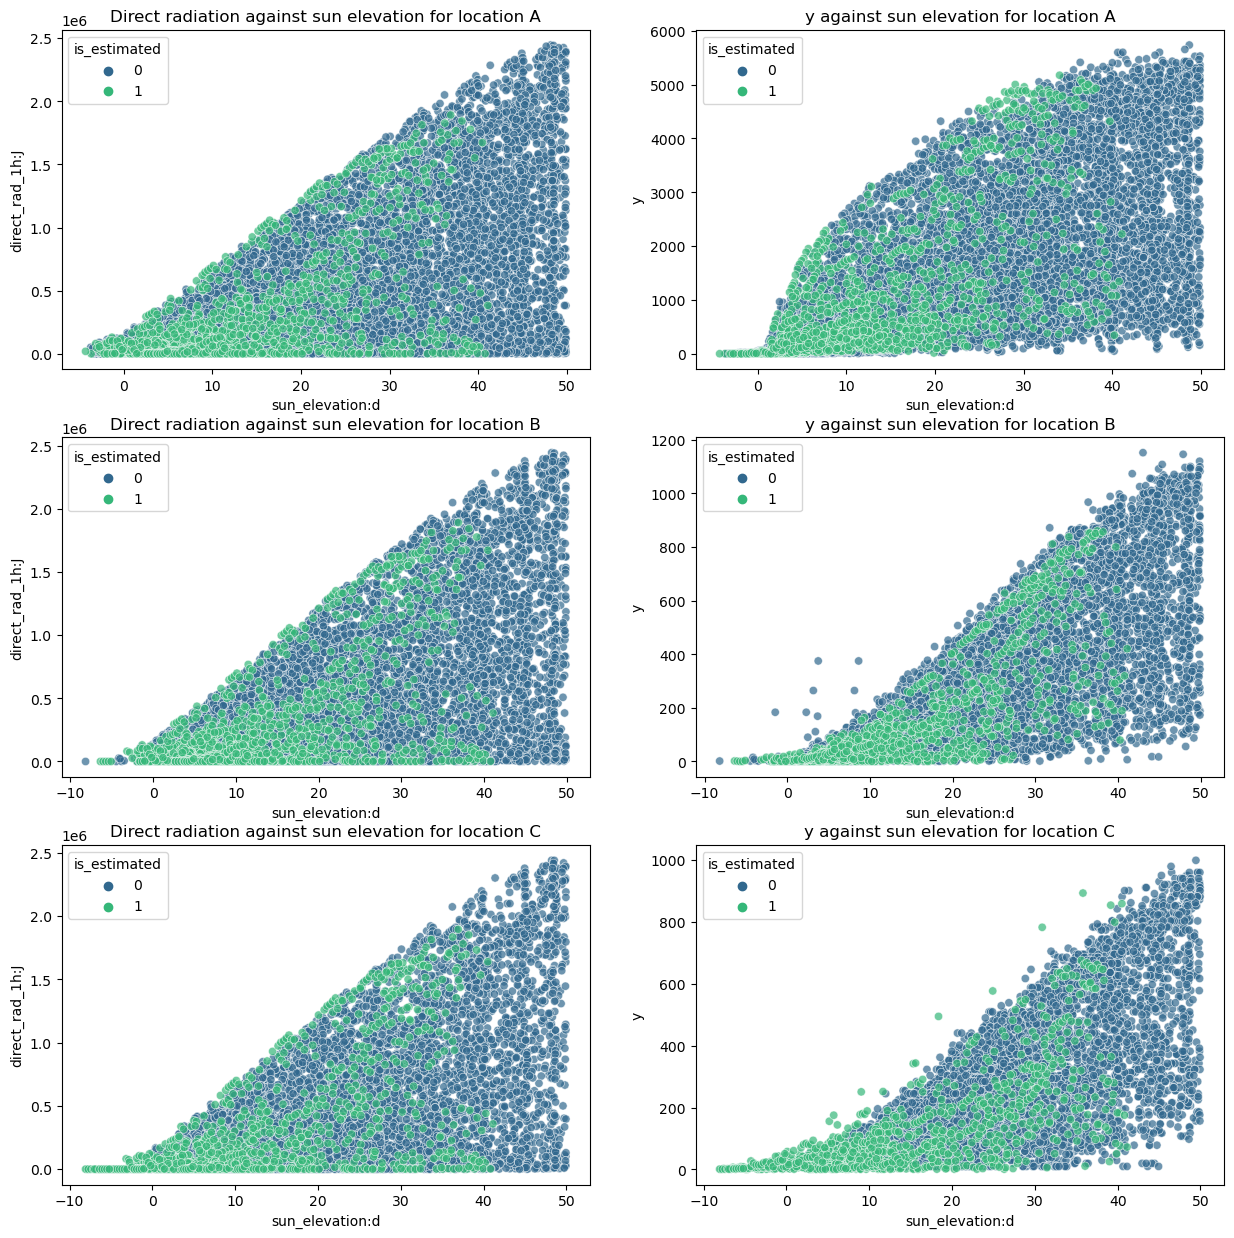

In [7]:
# Filter out rows where y == 0
temp = X_train[X_train["y"] != 0]

# Plotting
fig, axes = plt.subplots(len(locations), 2, figsize=(15, 5 * len(locations)))

for idx, location in enumerate(locations):
    sns.scatterplot(ax=axes[idx][0], data=temp[temp["location"] == location], x="sun_elevation:d", y="direct_rad_1h:J", hue="is_estimated", palette="viridis", alpha=0.7)
    axes[idx][0].set_title(f"Direct radiation against sun elevation for location {location}")
    
    sns.scatterplot(ax=axes[idx][1], data=temp[temp["location"] == location], x="sun_elevation:d", y="y", hue="is_estimated", palette="viridis", alpha=0.7)
    axes[idx][1].set_title(f"y against sun elevation for location {location}")

# Exploratory Data Analysis of the preprocessed data

**`train_data` dataset summary (sample size: 10000)**

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing_count,missing_ratio,raw_type,variable_type,special_types
absolute_humidity_2m:gm3,10000,608,,,5.933672,2.651639,0.525,4.0,5.4,7.7,16.375,float32,,,float,numeric,
air_density_2m:kgm3,10000,975,,,1.255848,0.036083,1.14275,1.23075,1.255,1.279,1.4365,float32,,,float,numeric,
ceiling_height_agl:m,8194,7972,,,2873.681641,2526.984863,27.849998,1080.362427,1892.112549,3947.512451,12042.525391,float32,1806,0.1806,float,numeric,
clear_sky_energy_1h:J,10000,5287,,,503511.0,809773.9375,0.0,0.0,7374.949951,753454.4375,3006049.25,float32,,,float,numeric,
clear_sky_rad:W,10000,4338,,,139.782806,224.976166,0.0,0.0,0.375,204.581253,835.599976,float32,,,float,numeric,
cloud_base_agl:m,9243,8874,,,1728.653198,1807.561157,27.5,594.162476,1157.199951,2047.512451,11673.625,float32,757,0.0757,float,numeric,
dew_or_rime:idx,10000,9,,,0.01075,0.234349,-1.0,0.0,0.0,0.0,1.0,float32,,,float,category,
dew_point_2m:K,10000,1511,,,275.054596,6.763975,247.700012,270.625,274.899994,280.274994,292.675018,float32,,,float,numeric,
diffuse_rad:W,10000,3707,,,39.195908,60.735817,0.0,0.0,0.175,64.324997,334.75,float32,,,float,numeric,
diffuse_rad_1h:J,10000,5279,,,141579.1875,215984.546875,0.0,0.0,11634.799805,231498.074219,1177433.75,float32,,,float,numeric,


**`test_data` dataset summary**

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing_count,missing_ratio,raw_type,variable_type,special_types
absolute_humidity_2m:gm3,2160,405,,,8.202084,2.191512,3.2,6.65,8.05,10.0,14.125,float32,2448,0.53125,float,numeric,
air_density_2m:kgm3,2160,570,,,1.232774,0.032043,1.14275,1.209437,1.238,1.2595,1.3005,float32,2448,0.53125,float,numeric,
ceiling_height_agl:m,1590,1531,,,3065.770508,2951.749023,46.450001,949.168701,1674.25,4054.912598,11468.0,float32,3018,0.654948,float,numeric,
clear_sky_energy_1h:J,2106,1807,,,1259229.5,1100671.125,0.0,80204.453125,1078664.625,2383141.75,3005707.0,float32,2502,0.542969,float,numeric,
clear_sky_rad:W,2160,1233,,,341.040741,306.855377,0.0,17.80625,299.512512,662.018738,835.525024,float32,2448,0.53125,float,numeric,
cloud_base_agl:m,1937,1890,,,1875.397461,2093.077881,30.225,505.424988,1037.525024,2426.399902,11467.799805,float32,2671,0.579644,float,numeric,
dew_or_rime:idx,2160,9,,,0.036111,0.18285,-1.0,0.0,0.0,0.0,1.0,float32,2448,0.53125,float,category,
dew_point_2m:K,2160,661,,,280.778992,4.364164,268.075012,277.924988,281.049988,284.375,290.049988,float32,2448,0.53125,float,numeric,
diffuse_rad:W,2160,1385,,,84.755867,78.432274,0.0,7.975,75.224998,134.418747,307.599976,float32,2448,0.53125,float,numeric,
diffuse_rad_1h:J,2106,1806,,,313548.09375,277278.1875,0.0,47998.699219,278980.65625,499993.5,1086246.25,float32,2502,0.542969,float,numeric,


**Types warnings summary**

,train_data,test_data,warnings
y,float,--,warning


### Feature Distance

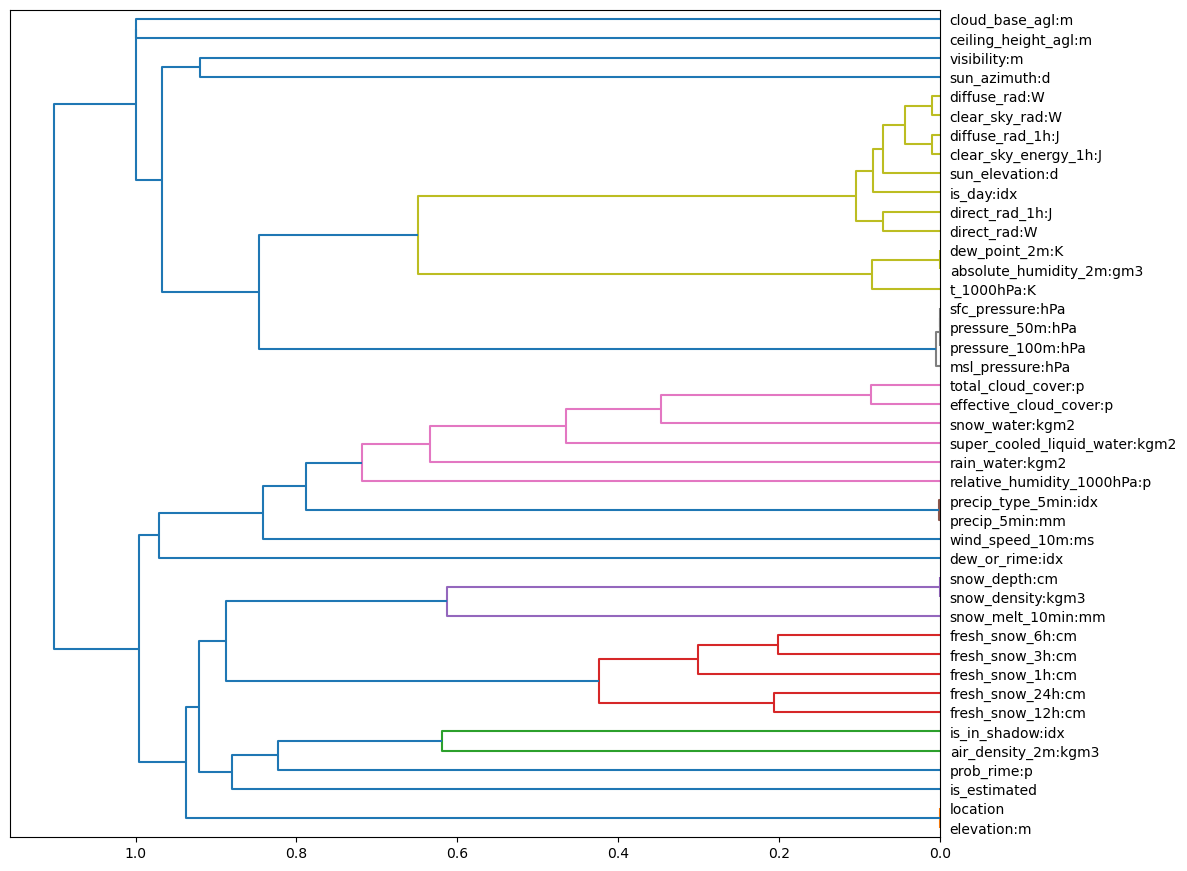

**The following feature groups are considered as near-duplicates**:

Distance threshold: <= `0.01`. Consider keeping only some of the columns within each group:

 - `elevation:m`, `location` - distance `0.00`
 - `absolute_humidity_2m:gm3`, `dew_point_2m:K` - distance `0.00`
 - `snow_density:kgm3`, `snow_depth:cm` - distance `0.00`
 - `precip_5min:mm`, `precip_type_5min:idx` - distance `0.00`
 - `msl_pressure:hPa`, `pressure_100m:hPa`, `pressure_50m:hPa`, `sfc_pressure:hPa` - distance `0.00`
 - `clear_sky_energy_1h:J`, `diffuse_rad_1h:J` - distance `0.01`

Feature interaction between `absolute_humidity_2m:gm3`/`dew_point_2m:K`

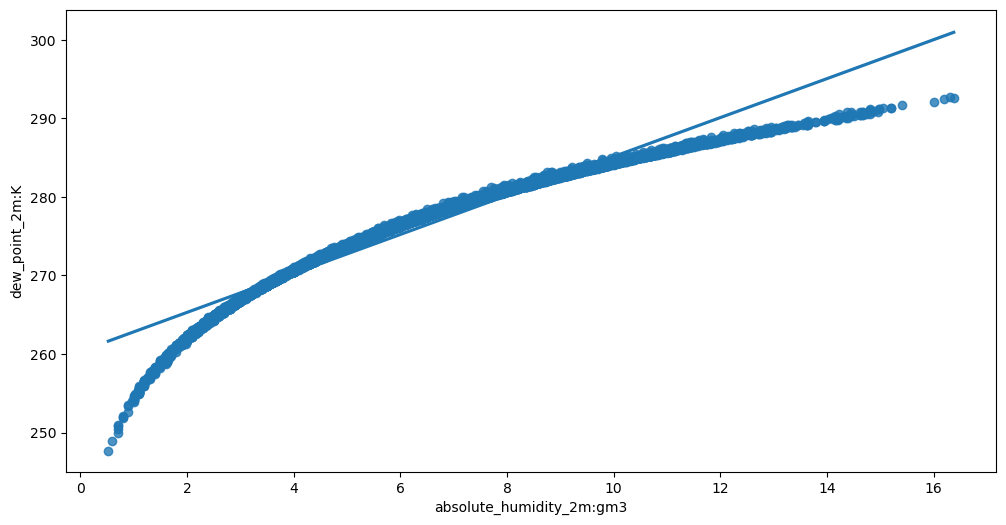

Feature interaction between `snow_density:kgm3`/`snow_depth:cm`

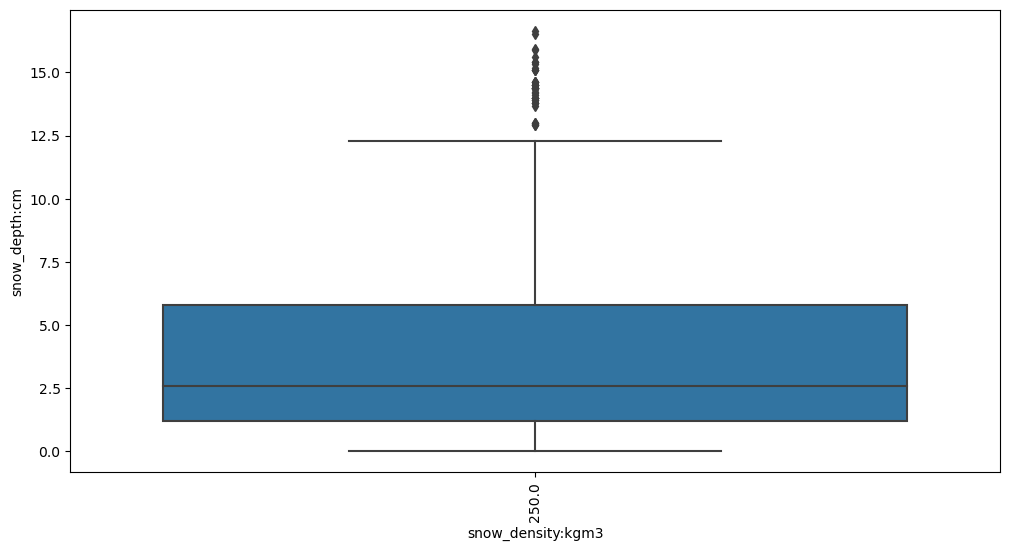

Feature interaction between `msl_pressure:hPa`/`pressure_100m:hPa`

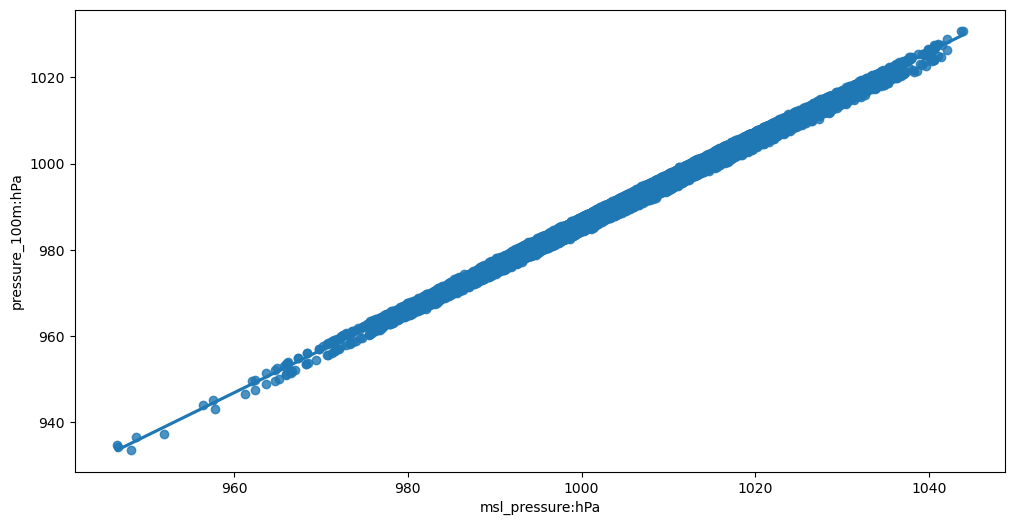

Feature interaction between `msl_pressure:hPa`/`pressure_50m:hPa`

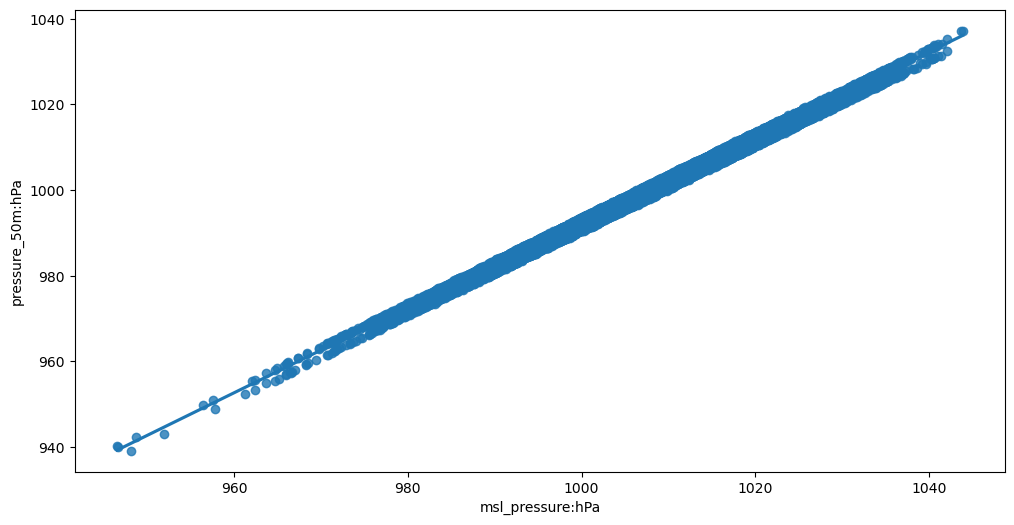

Feature interaction between `msl_pressure:hPa`/`sfc_pressure:hPa`

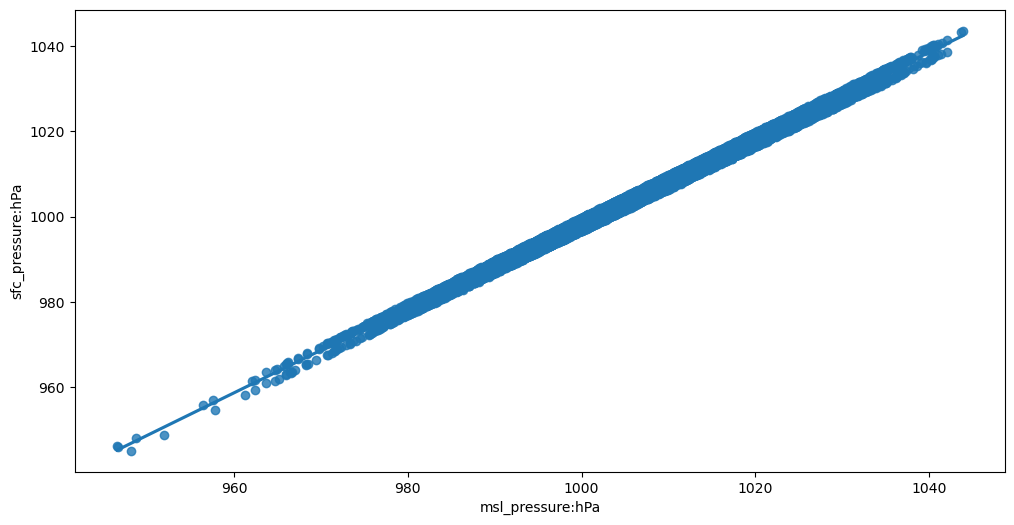

Feature interaction between `clear_sky_energy_1h:J`/`diffuse_rad_1h:J`

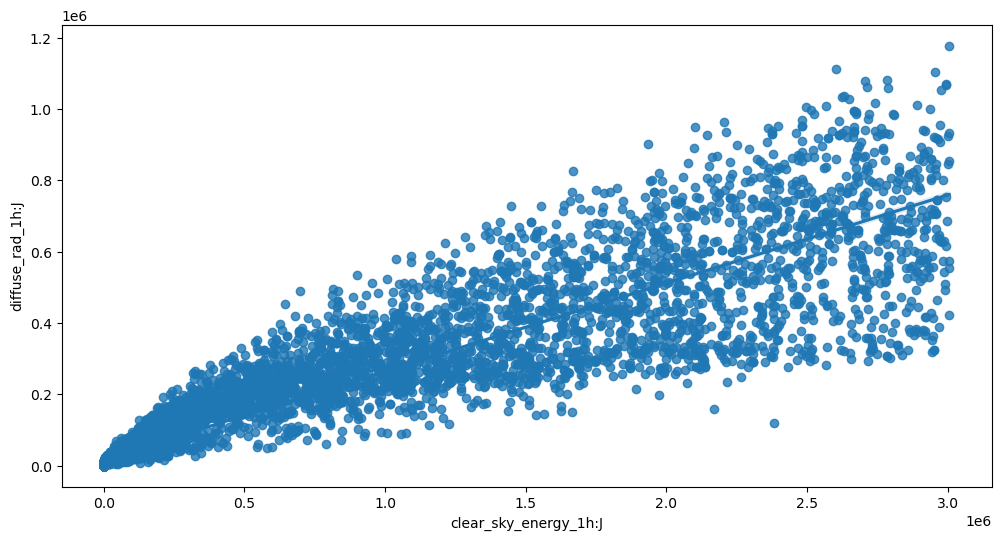

In [16]:
import autogluon.eda.auto as auto

auto.dataset_overview(train_data=X_train, test_data=X_test, label="y")

# Feature Engineering, Sample Weight Adjustment, and Group Creation for Time-Series Cross-Validation

In [8]:
for attr in use_dt_attrs:
    X_train[attr] = getattr(X_train.index, attr)
    X_test[attr] = getattr(X_test.index, attr)


# If the "sample_weight" column is present and weight_evaluation is True, multiply sample_weight with sample_weight_may_july if the ds is between 05-01 00:00:00 and 07-03 23:00:00, else add sample_weight as a column to X_train
if weight_evaluation:
    if "sample_weight" not in X_train.columns:
        X_train["sample_weight"] = 1

    X_train.loc[((X_train.index.month >= 5) & (X_train.index.month <= 6)) | ((X_train.index.month == 7) & (X_train.index.day <= 3)), "sample_weight"] *= sample_weight_may_july
        
    
print(X_train[((X_train.index.month >= 5) & (X_train.index.month <= 6)) | ((X_train.index.month == 7) & (X_train.index.day <= 3))].head(1))


if use_groups:
    # fix groups for cross validation
    locations = X_train['location'].unique()  # Assuming 'location' is the name of the column representing locations

    grouped_dfs = []  # To store data frames split by location

    # Loop through each unique location
    for loc in locations:
        loc_df = X_train[X_train['location'] == loc]
        
        # Sort the DataFrame for this location by the time column
        loc_df = loc_df.sort_index()
        
        # Calculate the size of each group for this location
        group_size = len(loc_df) // n_groups
        
        # Create a new 'group' column for this location
        loc_df['group'] = np.repeat(range(n_groups), repeats=[group_size]*(n_groups-1) + [len(loc_df) - group_size*(n_groups-1)])
        
        # Append to list of grouped DataFrames
        grouped_dfs.append(loc_df)

    # Concatenate all the grouped DataFrames back together
    X_train = pd.concat(grouped_dfs)
    X_train.sort_index(inplace=True)
    print(X_train["group"].head())

                     absolute_humidity_2m:gm3  air_density_2m:kgm3  \
ds                                                                   
2019-06-02 23:00:00                       7.7               1.2235   

                     ceiling_height_agl:m  clear_sky_energy_1h:J  \
ds                                                                 
2019-06-02 23:00:00           1689.824951                    0.0   

                     clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  \
ds                                                                        
2019-06-02 23:00:00              0.0       1689.824951              0.0   

                     dew_point_2m:K  diffuse_rad:W  diffuse_rad_1h:J  ...  \
ds                                                                    ...   
2019-06-02 23:00:00      280.299988            0.0               0.0  ...   

                     t_1000hPa:K  total_cloud_cover:p  visibility:m  \
ds                                                     

# Feature selection

In [9]:
# See config for variable declaration
X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)

X_train.to_csv('X_train_raw.csv', index=True)
X_test.to_csv('X_test_raw.csv', index=True)

# Split handling

In [10]:
# Create a plot of X_train showing its "y" and color it based on the value of the sample_weight column.
if "sample_weight" in X_train.columns:
    sns.scatterplot(data=X_train, x=X_train.index, y="y", hue="sample_weight", palette="deep", size=3)
    plt.show()

In [11]:
def normalize_sample_weights_per_location(df):
    for loc in locations:
        loc_df = df[df["location"] == loc]
        loc_df["sample_weight"] = loc_df["sample_weight"] / loc_df["sample_weight"].sum() * loc_df.shape[0]
        df[df["location"] == loc] = loc_df
    return df

def split_and_shuffle_data(input_data, num_bins, frac1):
    """
    Splits the input_data into num_bins and shuffles them, then divides the bins into two datasets based on the given fraction for the first set.

    Args:
        input_data (pd.DataFrame): The data to be split and shuffled.
        num_bins (int): The number of bins to split the data into.
        frac1 (float): The fraction of each bin to go into the first output dataset.

    Returns:
        pd.DataFrame, pd.DataFrame: The two output datasets.
    """
    # Validate the input fraction
    if frac1 < 0 or frac1 > 1:
        raise ValueError("frac1 must be between 0 and 1.")
    
    if frac1==1:
        return input_data, pd.DataFrame()

    # Calculate the fraction for the second output set
    frac2 = 1 - frac1
    
    # Calculate bin size
    bin_size = len(input_data) // num_bins

    # Initialize empty DataFrames for output
    output_data1 = pd.DataFrame()
    output_data2 = pd.DataFrame()

    for i in range(num_bins):
        # Shuffle the data in the current bin
        np.random.seed(i)
        current_bin = input_data.iloc[i * bin_size: (i + 1) * bin_size].sample(frac=1)
        
        # Calculate the sizes for each output set
        size1 = int(len(current_bin) * frac1)
        
        # Split and append to output DataFrames
        output_data1 = pd.concat([output_data1, current_bin.iloc[:size1]])
        output_data2 = pd.concat([output_data2, current_bin.iloc[size1:]])

    # Shuffle and split the remaining data
    remaining_data = input_data.iloc[num_bins * bin_size:].sample(frac=1)

    remaining_size1 = int(len(remaining_data) * frac1)
    
    output_data1 = pd.concat([output_data1, remaining_data.iloc[:remaining_size1]])
    output_data2 = pd.concat([output_data2, remaining_data.iloc[remaining_size1:]])

    return output_data1, output_data2


In [12]:
data = TabularDataset('X_train_raw.csv')
# set group column of train_data be increasing from 0 to 7 based on time, the first 1/8 of the data is group 0, the second 1/8 of the data is group 1, etc.
data['ds'] = pd.to_datetime(data['ds'])
data = data.sort_values(by='ds')

# # print size of the group for each location
# for loc in locations:
#     print(f"Location {loc}:")
#     print(train_data[train_data["location"] == loc].groupby('group').size())


# get end date of train data and subtract 3 months
#split_time = pd.to_datetime(train_data["ds"]).max() - pd.Timedelta(hours=tune_and_test_length)
# 2022-10-28 22:00:00
split_time = pd.to_datetime("2022-10-28 22:00:00")
train_set = TabularDataset(data[data["ds"] < split_time])
estimated_set = TabularDataset(data[data["ds"] >= split_time]) # only estimated

test_set = pd.DataFrame()
tune_set = pd.DataFrame()
new_train_set = pd.DataFrame()

if not use_tune_data:
    raise Exception("Not implemented")
    
for location in locations:
    loc_data = data[data["location"] == location]
    num_train_rows = len(loc_data)
    
    tune_rows = 1500.0 # 2500.0
    if use_test_data:
        tune_rows = 1880.0#max(3000.0, len(estimated_set[estimated_set["location"] == location]))

    holdout_frac = max(0.01, min(0.1, tune_rows / num_train_rows)) * num_train_rows / len(estimated_set[estimated_set["location"] == location])

    print(f"Size of estimated for location {location}: {len(estimated_set[estimated_set['location'] == location])}. Holdout frac should be % of estimated: {holdout_frac}")

    # shuffle and split data
    loc_tune_set, loc_new_train_set = split_and_shuffle_data(estimated_set[estimated_set['location'] == location], 40, holdout_frac)
    print(f"Length of location tune set : {len(loc_tune_set)}")
    new_train_set = pd.concat([new_train_set, loc_new_train_set])

    if use_test_data:
        loc_test_set, loc_tune_set = split_and_shuffle_data(loc_tune_set, 40, 0.2)
        test_set = pd.concat([test_set, loc_test_set])

    tune_set = pd.concat([tune_set, loc_tune_set])




print("Length of train set before adding test set", len(train_set))
# add rest to train_set
train_set = pd.concat([train_set, new_train_set])
print("Length of train set after adding test set", len(train_set))




if use_groups:
    test_set = test_set.drop(columns=['group'])


tuning_data = tune_set

# number of rows in tuning data for each location
print("Shapes of tuning data", tuning_data.groupby('location').size())


    
if use_test_data:
    test_data = test_set
    print("Shape of test", test_data.shape[0])


train_data = train_set

# ensure sample weights for your training (or tuning) data sum to the number of rows in the training (or tuning) data. 
if weight_evaluation:
    # ensure sample weights for data sum to the number of rows in the tuning /train data.
    tuning_data = normalize_sample_weights_per_location(tuning_data)
    train_data = normalize_sample_weights_per_location(train_data)
    if use_test_data:
        test_data = normalize_sample_weights_per_location(test_data)


train_data = TabularDataset(train_data)
tuning_data = TabularDataset(tuning_data)

if use_test_data:
    test_data = TabularDataset(test_data)

Size of estimated for location A: 4214. Holdout frac should be % of estimated: 0.4461319411485524
Length of location tune set : 1846
Size of estimated for location B: 3533. Holdout frac should be % of estimated: 0.5321256722332296
Length of location tune set : 1846
Size of estimated for location C: 2923. Holdout frac should be % of estimated: 0.6431748203900103
Length of location tune set : 1841
Length of train set before adding test set 77247
Length of train set after adding test set 82384
Shapes of tuning data location
A    1485
B    1485
C    1481
dtype: int64
Shape of test 1082


In [13]:
# train_data_temp = train_data.copy()
# tune_data_temp = tuning_data.copy()
# test_data_temp = test_data.copy()